In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import sympy as sym
# from sympy.functions import exp
# from sympy.abc import x

In [7]:
n_curves = 5

In [75]:
# Definimos la función PHI

def get_phi_j(x, mu_j, sig_j):
    phi = np.exp( - (1 / (2* sig_j**2)) * (x - mu_j)**2)
    return phi


def get_PHI(X, mus, sigs):
    PHI = np.zeros((len(X), len(mus)))
    for j in range(len(mus)):
        PHI[:, j] = get_phi_j(X, mus[j], sigs[j])
    return PHI

def get_yh(X, a, mus, sigs):
    PHI = get_PHI(X, mus, sigs)
    yh = PHI.dot(a)
    return yh

def get_error(y, y_h):
    residual = y - y_h
    return residual

def get_phi_partial_mu(x, mu_j, sig_j):
    phi_j = get_phi_j(x, mu_j, sig_j)
    partial_phi_mu = ((x - mu_j) / sig_j)*phi_j
    return partial_phi_mu

def get_phi_partial_sig(x, mu_j, sig_j):
    phi_j = get_phi_j(x, mu_j, sig_j)
    get_phi_partial_sig = ((x - mu_j)**2 / sig_j**3)*phi_j
    return get_phi_partial_sig

def grad(X, a, mus, sigs):
    partials_mu = np.zeros((len(X), len(mus)))
    for j in range(len(mus)):
        partials_mu[:, j] = get_phi_partial_mu(X, mus[j], sigs[j])
    grad_mus = partials_mu.sum(axis=0)
        
    partials_sig = np.zeros((len(X), len(sigs)))
    for j in range(len(sigs)):
        partials_sig[:, j] = get_phi_partial_sig(X, mus[j], sigs[j])
    grad_sigs = partials_sig.sum(axis=0)
        
    # Concatenate the set of partials
    grad = np.concatenate((grad_mus, grad_sigs))
    return grad

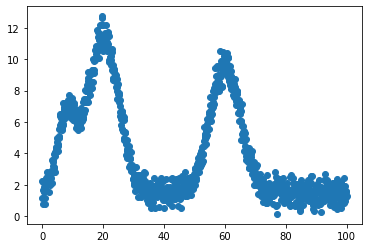

In [76]:
X = np.linspace(0, 100, 1000)
y_1 = 10 * get_phi_j(X, 20, 5) + np.random.rand(1000)
y_2 = 8 * get_phi_j(X, 60, 5) + np.random.rand(1000)
y_3 = 5 * get_phi_j(X, 8, 3) + np.random.rand(1000)

y = y_1 + y_2 + y_3
plt.scatter(X, y)

In [80]:
mus = [1, 1, 1]
sigs = [1, 1, 1]
alphas = [10, 8, 5]

In [82]:
np.concatenate((mus, sigs)) - 0.01*grad(X, alphas, mus, sigs)

array([0.94244022, 0.94244022, 0.94244022, 0.84682617, 0.84682617,
       0.84682617])

In [89]:
def GD(grad, X, y, a, mus, sigs, n_iter, lr=0.01):
    
    theta = np.concatenate([mus, sigs])
    Theta = []
    
    for t in range(n_iter):
        p = grad(X, a, mus, sigs)
        theta = theta + lr*p
        Theta.append(theta)
    return np.array(Theta)

GD(grad, X, y, alphas, mus, sigs, n_iter=100)

array([[ 1.05755978,  1.05755978,  1.05755978,  1.15317383,  1.15317383,
         1.15317383],
       [ 1.11511955,  1.11511955,  1.11511955,  1.30634766,  1.30634766,
         1.30634766],
       [ 1.17267933,  1.17267933,  1.17267933,  1.45952148,  1.45952148,
         1.45952148],
       [ 1.23023911,  1.23023911,  1.23023911,  1.61269531,  1.61269531,
         1.61269531],
       [ 1.28779888,  1.28779888,  1.28779888,  1.76586914,  1.76586914,
         1.76586914],
       [ 1.34535866,  1.34535866,  1.34535866,  1.91904297,  1.91904297,
         1.91904297],
       [ 1.40291844,  1.40291844,  1.40291844,  2.0722168 ,  2.0722168 ,
         2.0722168 ],
       [ 1.46047821,  1.46047821,  1.46047821,  2.22539062,  2.22539062,
         2.22539062],
       [ 1.51803799,  1.51803799,  1.51803799,  2.37856445,  2.37856445,
         2.37856445],
       [ 1.57559777,  1.57559777,  1.57559777,  2.53173828,  2.53173828,
         2.53173828],
       [ 1.63315754,  1.63315754,  1.63315754,  2.

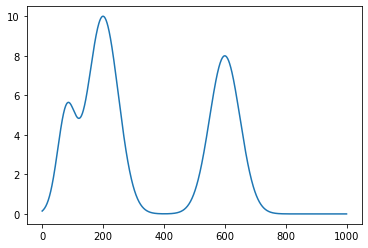

In [30]:

PHI = get_PHI(X, mus, sigs)

yh = get_yh(X, alphas, mus, sigs)
plt.plot(yh)

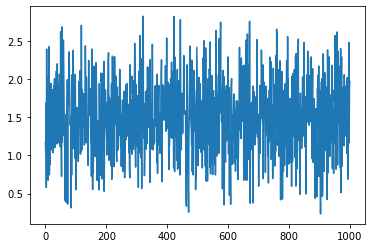

In [31]:
# Get the errors
plt.plot(get_error(y, yh))

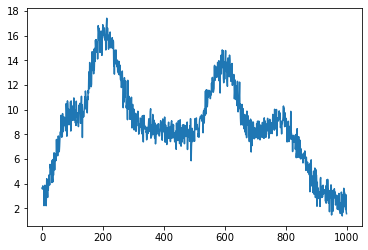

In [117]:
X = np.linspace(0, 100, 1000)
y_1 = 10 * phi_ij(X, 20, 5) + np.random.rand(1000)
y_2 = 8 * phi_ij(X, 60, 5) + np.random.rand(1000)
y_3 = 5 * phi_ij(X, 8, 3) + np.random.rand(1000)
y_4 = 6 * phi_ij(X, 78, 7) + np.random.rand(1000)
y_5 = 6 * phi_ij(X, 38, 18) + np.random.rand(1000)
y_5 = 6 * phi_ij(X, 38, 18) + np.random.rand(1000)

plt.plot(y_1 + y_2 + y_3 + y_4 + y_5)

In [99]:
np.random.rand()

0.7553931952017077

Gaussiana sin amplitud:
$$\phi_{ij} = exp(\frac{- (x - \mu)^2}{2  \sigma ^ 2})$$

Función $\Phi$:
$$\ = $$

In [85]:
np.zeros_like(np.arange(10), ) 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [90]:
from sympy.calculus.euler import euler_equations
x = sym.Symbol('x')
a = sym.Symbol('a')
mu = sym.Symbol(r'\mu')
sig = sym.Symbol(r'\sigma')
phi = sym.Function('phi')

phi = exp( - (1 / (2* sig**2)) * (x - mu)**2)
phi

exp(-(-\mu + x)**2/(2*\sigma**2))

In [35]:
sym.diff(phi, mu)

-(2*\mu - 2*x)*exp(-(-\mu + x)**2/(2*\sigma**2))/(2*\sigma**2)

In [91]:
sym.diff(phi, sig)

(-\mu + x)**2*exp(-(-\mu + x)**2/(2*\sigma**2))/\sigma**3

In [88]:
phi

exp(-(-\mu + x)**2/(2*\sigma**2))

In [ ]:
(x - mu_j) / sig_j)

In [351]:
# Tratar de ajustar una gaussiana a la distribuci'on de puntos

In [58]:
A = 10 # por ahora es constante

def phi(x, mu_j, sig_j):
    phi = np.exp( (- 1 / (2* sig_j**2)) * (x - mu_j)**2)
    return phi

def error(y, yh):
    error = yh - y
    return error

# Derivada con respecto a mu
def partial_J_mu(x, y, mu_j, sig_j):
    phi_j = phi(x, mu_j, sig_j)
    J_mu = (phi_j - y).dot( phi_j * ((x - mu_j) / sig_j**2) )
    return J_mu

def partial_J_sig(x, y, mu_j, sig_j):
    phi_j = phi(x, mu_j, sig_j)
    J_sig = (phi_j - y).dot( phi_j  * ((x - mu_j)**2 / sig_j**3) )
    return J_sig
    


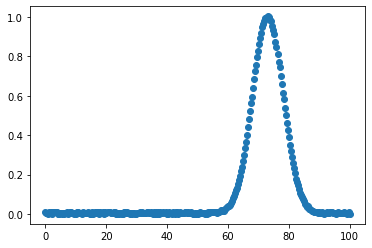

In [101]:
x = np.linspace(0, 100, 300)
y = phi(x, 73, 5) + np.random.rand(300)/100

plt.scatter(x, y);

In [102]:
mu_j = 5
sig_j = 10
partial_J_mu(x, y, mu_j, sig_j)
phi_j = phi(x, mu_j, sig_j)

# phi_j 

In [104]:
mu_j = 2
sig_j = 2

lr = 0.01
error = []
for i in range(10000):
    g_m = partial_J_mu(x, y, mu_j, sig_j)
    g_s = partial_J_sig(x, y, mu_j, sig_j)

    mu_j = mu_j - lr * g_m
    sig_j = sig_j - lr * g_s
    

sig_j
mu_j

1.8280704605701847

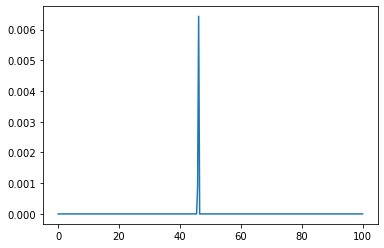

In [100]:
yh = phi(x, mu_j, sig_j)

plt.plot(x, yh)

In [ ]:
def J(theta, x, y):

In [402]:
from numpy import loadtxt

from lmfit.models import GaussianModel



mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 300
    # variables        = 3
    chi-square         = 88.9957794
    reduced chi-square = 0.29964909
    Akaike info crit   = -358.558059
    Bayesian info crit = -347.446711
[[Variables]]
    amplitude:  139.560918 +/- 1.70069145 (1.22%) (init = 192.8397)
    center:     33.0700714 +/- 0.07637211 (0.23%) (init = 32.95243)
    sigma:      5.42743084 +/- 0.07637204 (1.41%) (init = 6.020067)
    fwhm:       12.7806227 +/- 0.17984240 (1.41%) == '2.3548200*sigma'
    height:     10.2583995 +/- 0.12501074 (1.22%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.577
